### exercise 6: beyond linearity 

### task 4: local regression 

In [1]:
import pandas as pd
import numpy as np

from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
Wages = pd.read_csv(r'C:\Users\Chijun Zhang\Documents\jupyter\machine learning exercise\datasets\Wage.csv')
Wages.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
Wages = Wages.rename(columns={'Unnamed: 0': 'id'})
print(pd.isnull(Wages).any())

id            False
year          False
age           False
sex           False
maritl        False
race          False
education     False
region        False
jobclass      False
health        False
health_ins    False
logwage       False
wage          False
dtype: bool


In [4]:
predictions20 = lowess(Wages.wage, Wages.age, frac=0.2, delta=0)
predictions50 = lowess(Wages.wage, Wages.age, frac=0.5, delta=0)

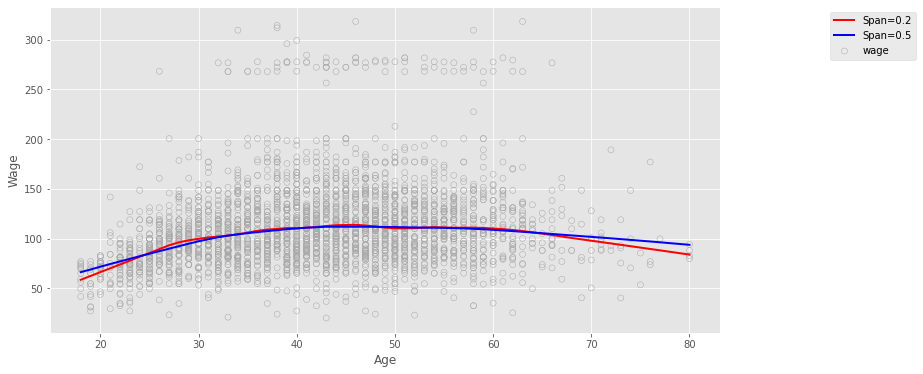

In [5]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.scatter(Wages.age, Wages.wage,facecolors='none', edgecolors='darkgray', label="wage");
ax.plot(np.sort(Wages.age), predictions20[:,1], 'r-', lw=2, label='Span=0.2')
ax.plot(np.sort(Wages.age), predictions50[:,1], 'b-', lw=2, label='Span=0.5')

# Labels
ax.set_xlabel('Age')
ax.set_ylabel('Wage');
plt.legend(bbox_to_anchor=(1.3, 1.0));